In [19]:
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
from scipy import stats

In [2]:
# Working directory
work_dir = '/Users/arbailey/natcap/idb/data/work/mangroves/tandemx/'
os.chdir(work_dir)
# Version 1
gmf_chm_source1 = os.path.join(work_dir, 'gmf_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
gmw2016_chm_source1 = os.path.join(work_dir, 'gmw2016_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
wam_chm_source1 = os.path.join(work_dir, 'wam_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
tnc_chm_source1 = os.path.join(work_dir, 'tnc_Andros_TDX_DEM_12m_EGM2008_CanopyHeight.tif')
# Version 2
gmf_chm_source2 = os.path.join(work_dir, 'gmf_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')
gmw2016_chm_source2 = os.path.join(work_dir, 'gmw2016_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')
wam_chm_source2 = os.path.join(work_dir, 'wam_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')
tnc_chm_source2 = os.path.join(work_dir, 'tnc_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')

In [3]:
def rast2np(raster_source):
    with rio.open(raster_source) as src:
        raster_np = src.read(1, masked=True)
        raster_meta = src.meta
    return raster_np

# Read in the mangrove extent canopy height rasters
# Version 1
gmf_tdxV1 = rast2np(gmf_chm_source1)
gmw2016_tdxV1 = rast2np(gmw2016_chm_source1)
wam_tdxV1 = rast2np(wam_chm_source1)
tnc_tdxV1 = rast2np(wam_chm_source1)
# Version 2
gmf_tdxV2 = rast2np(gmf_chm_source2)
gmw2016_tdxV2 = rast2np(gmw2016_chm_source2)
wam_tdxV2 = rast2np(wam_chm_source2)
tnc_tdxV2 = rast2np(wam_chm_source2)





In [8]:
gmf_tdx_diff = gmf_tdxV1 - gmf_tdxV2

In [9]:
gmf_tdx_diff

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0,
  dtype=float32)

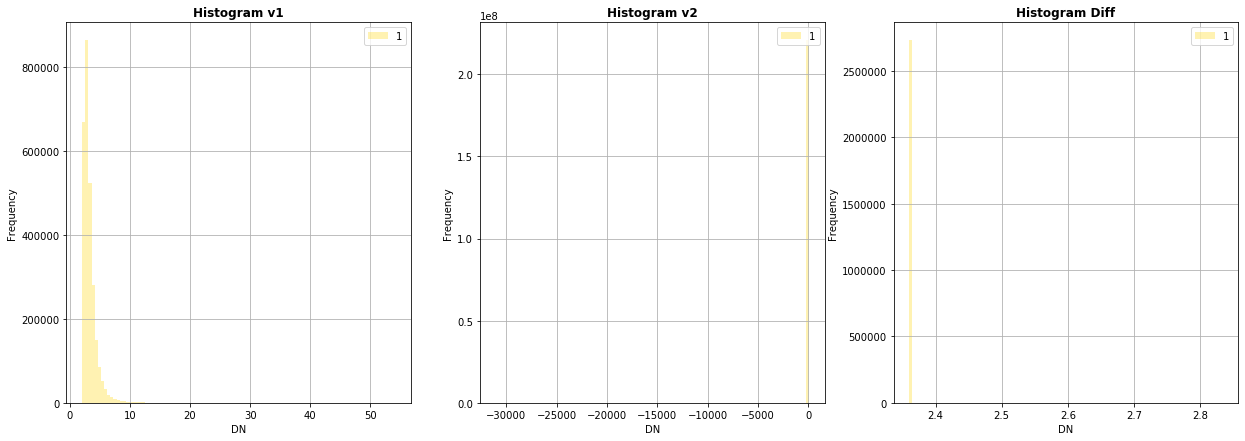

In [15]:
fig, (axv1, axv2, axdiff) = plt.subplots(1, 3, figsize=(21, 7))
show_hist(gmf_tdxV1, ax=axv1, bins=100, lw=0.0, stacked=False, alpha=0.3, title="Histogram v1")
show_hist(gmf_tdxV2, ax=axv2, bins=100, lw=0.0, stacked=False, alpha=0.3, title="Histogram v2")
show_hist(gmf_tdx_diff, ax=axdiff, bins=100, lw=0.0, stacked=False, alpha=0.3, title="Histogram Diff")
plt.show()

In [21]:
stats.mstats.describe(gmf_tdx_diff)

/Users/arbailey/miniconda3/envs/geoenv/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:2345: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
/Users/arbailey/miniconda3/envs/geoenv/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:2345: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))


DescribeResult(nobs=array([3, 2, 3, ..., 6, 6, 6]), minmax=(masked_array(data=2.3599997,
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=2.834453,
             mask=False,
       fill_value=1e+20,
            dtype=float32)), mean=masked_array(data=[2.359999974568685, 2.3600001335144043,
                   2.359999974568685, ..., 2.359999656677246,
                   2.359999656677246, 2.359999656677246],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20), variance=masked_array(data=[1.2631870857957338e-14, 2.842170943040401e-14,
                   1.2631870857957338e-14, ..., 0.0, 0.0, 0.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=0.0), skewness=masked_array(data=[0.7071067772352805, -1.414213562373095,
                   0.7071067772352805, ..., 0.0, 0.0, 0.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20),

In [26]:
stats.describe(gmf_tdx_diff, axis=0)

DescribeResult(nobs=17171, minmax=(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([2.3600001, 2.3600001, 2.3600001, ..., 2.3599997, 2.3599997,
       2.3599997], dtype=float32)), mean=array([0.00041232, 0.00027488, 0.00041232, ..., 0.00082465, 0.00082465,
       0.00082465], dtype=float32), variance=array([0.00097288, 0.00064865, 0.00097288, ..., 0.00194508, 0.00194508,
       0.00194508], dtype=float32), skewness=array([75.645256, 92.650085, 75.645256, ..., 53.489285, 53.489285,
       53.489285], dtype=float32), kurtosis=array([5719.6914, 8581.524 , 5719.6914, ..., 2858.3467, 2858.3467,
       2858.3467], dtype=float32))

In [22]:
stats.describe(gmf_tdx_diff)

DescribeResult(nobs=17171, minmax=(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([2.3600001, 2.3600001, 2.3600001, ..., 2.3599997, 2.3599997,
       2.3599997], dtype=float32)), mean=array([0.00041232, 0.00027488, 0.00041232, ..., 0.00082465, 0.00082465,
       0.00082465], dtype=float32), variance=array([0.00097288, 0.00064865, 0.00097288, ..., 0.00194508, 0.00194508,
       0.00194508], dtype=float32), skewness=array([75.645256, 92.650085, 75.645256, ..., 53.489285, 53.489285,
       53.489285], dtype=float32), kurtosis=array([5719.6914, 8581.524 , 5719.6914, ..., 2858.3467, 2858.3467,
       2858.3467], dtype=float32))

In [27]:
print(gmf_tdx_diff.count())
print(np.min(gmf_tdx_diff))
print(np.max(gmf_tdx_diff))
print(np.mean(gmf_tdx_diff))

2729730
2.3599997
2.834453
2.3600002564356184


/Users/arbailey/miniconda3/envs/geoenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


--


In [28]:
counts,bins = np.histogram(gmf_tdx_diff) 
print("counts:", counts)
print("bins:", bins)

counts: [217934791         0         0         0         0         0         0
         0   2729729         1]
bins: [0.         0.2834453  0.5668906  0.85033596 1.1337812  1.4172266
 1.7006719  1.9841172  2.2675624  2.5510077  2.834453  ]


In [29]:
counts,bins = np.histogram(gmf_tdxV1) 
print("counts:", counts)
print("bins:", bins)

counts: [220534834    120264      6825      1601       371       255       179
        99        53        40]
bins: [ 0.        5.415357 10.830714 16.24607  21.661428 27.076786 32.49214
 37.9075   43.322857 48.738216 54.153572]


In [30]:
counts,bins = np.histogram(gmf_tdxV2)
print("counts:", counts)
print("bins:", bins)

counts: [      654         0         0         0         0         0         0
         0         0 220663867]
bins: [-31067.455   -27952.53    -24837.604   -21722.678   -18607.752
 -15492.826   -12377.901    -9262.976    -6148.05     -3033.124
     81.80176]
